# Chapter 4 Step 2: 데이터셋 준비
- 데이터 분석 문제가 정의 되면 데이터 수집 및 전처리

## Data Collection (데이터 수집)

## EDA(Exploaratoy Data Analysis) ; 탐색적 데이터 분석

### 'Sweetviz' lib 를 사용한 간단한 EDA

In [3]:
import pandas as pd
import numpy as np
import sweetviz as sv

/Users/chulwonchae/.pyenv/versions/3.11.4/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [6]:
np.random.seed(42)
# Generate sample data
data = {
    'Age': np.random.randint(8, 90, size=100),
    'Income': np.random.randint(10000, 500000,
size=100),
    'Gender': np.random.choice(['Male', 'Female'],
size=100),
    'City': np.random.choice(['New York', 'Singapore',
'Paris', 'Rome', 'Tokyo'], size=100)
}
# Create a DataFrame
df = pd.DataFrame(data)
df

,Age,Income,Gender,City
0,59,144633,Female,New York
1,22,298998,Male,Paris
2,79,336649,Male,Rome
3,68,114488,Female,New York
4,28,193323,Male,New York
...,...,...,...,...
95,15,102787,Female,Paris
96,42,137948,Female,Singapore
97,42,65016,Male,Singapore
98,40,412690,Female,Paris


In [8]:
# Generate the general report 
general_report = sv.analyze(df)
general_report.show_html('sweetviz_report.html')

# Generate report by gender(카테고리컬 데이터: 성별을 비교 대상)
gender_report = sv.compare_intra(df, df['Gender'] ==
'Male', ['Male', 'Female'])
gender_report.show_html('sweetviz_gender_comparison.html')

Done! Use 'show' commands to display/save.   |██████████| [100%]   00:00 -> (00:00 left)


Report sweetviz_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


Done! Use 'show' commands to display/save.   |██████████| [100%]   00:00 -> (00:00 left)

Report sweetviz_gender_comparison.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


## Data Preprocessing (데이터 전처리)
1. Missing Data (결측치 처리)
2. Outliers (이상치 처리)
3. Feature Engineering (피쳐 엔지니어링)
4. Scaling (스케일링)
5. Time Series Data - Stationary (시계열데이터-정상화)
6. Time Series Data - Cointegrated (시계열데이터-공적분)

### 1. Missing Data (결측치 처리)

In [47]:
import pandas as pd
import numpy as np

# Set random seed for reproducibility
np.random.seed(42)

# Generate synthetic financial data
n_samples = 1000
data = {
    'Date': pd.date_range(start='1/1/2023',
periods=n_samples, freq='D'),
    'Open': np.random.uniform(100, 500, size=n_samples),
    'High': np.random.uniform(100, 500, size=n_samples),
    'Low': np.random.uniform(100, 500, size=n_samples),
    'Close': np.random.uniform(100, 500,
size=n_samples),
    'Volume': np.random.randint(1000, 100000,
size=n_samples)
}
# Convert Volume to float
data['Volume'] = data['Volume'].astype(float)

# Introduce some missing values for demonstration (nan값 입력)
data['Volume'][np.random.choice(n_samples, size=50,
replace=False)] = np.nan
data['Close'][np.random.choice(n_samples, size=20,
replace=False)] = np.nan

# Create a DataFrame
df = pd.DataFrame(data)
df

,Date,Open,High,Low,Close,Volume
0,2023-01-01,249.816048,174.053172,204.682273,369.081198,22097.0
1,2023-01-02,480.285723,316.760379,198.791520,418.672559,4092.0
2,2023-01-03,392.797577,449.178334,462.501832,200.187160,54311.0
3,2023-01-04,339.463394,392.889955,199.818480,349.949640,23692.0
4,2023-01-05,162.407456,422.624459,208.779890,328.698393,24862.0
...,...,...,...,...,...,...
995,2025-09-22,136.632829,362.782063,446.118304,276.842814,17766.0
996,2025-09-23,466.925430,482.645848,162.909283,NaN,94922.0
997,2025-09-24,154.727452,127.583207,223.915144,257.828926,12695.0
998,2025-09-25,480.094942,122.821888,216.018213,311.976235,NaN


In [10]:
# Check for missing values
missing_data = df.isnull().sum()
print(missing_data)

Date       0
Open       0
High       0
Low        0
Close     20
Volume    50
dtype: int64


### 결측치 처리 방법 

#### a. Removing missing values

In [11]:
# Drop rows with missing values (행 삭제)
df_cleaned = df.dropna()
df_cleaned

,Date,Open,High,Low,Close,Volume
0,2023-01-01,249.816048,174.053172,204.682273,369.081198,22097.0
1,2023-01-02,480.285723,316.760379,198.791520,418.672559,4092.0
2,2023-01-03,392.797577,449.178334,462.501832,200.187160,54311.0
3,2023-01-04,339.463394,392.889955,199.818480,349.949640,23692.0
4,2023-01-05,162.407456,422.624459,208.779890,328.698393,24862.0
...,...,...,...,...,...,...
992,2025-09-19,208.858055,344.090060,321.082830,400.987335,35980.0
993,2025-09-20,336.092267,154.141633,258.621473,120.517540,23504.0
994,2025-09-21,244.389559,400.550034,152.686011,297.014152,55970.0
995,2025-09-22,136.632829,362.782063,446.118304,276.842814,17766.0


In [13]:
# Drop columns with missing values (컬럼 삭제)
df_cleaned = df.dropna(axis=1)
df_cleaned

,Date,Open,High,Low
0,2023-01-01,249.816048,174.053172,204.682273
1,2023-01-02,480.285723,316.760379,198.791520
2,2023-01-03,392.797577,449.178334,462.501832
3,2023-01-04,339.463394,392.889955,199.818480
4,2023-01-05,162.407456,422.624459,208.779890
...,...,...,...,...
995,2025-09-22,136.632829,362.782063,446.118304
996,2025-09-23,466.925430,482.645848,162.909283
997,2025-09-24,154.727452,127.583207,223.915144
998,2025-09-25,480.094942,122.821888,216.018213


#### b.1. Imputation - Mean/Median/Mode Imputation

In [15]:
from sklearn.impute import SimpleImputer
# Using mean for imputation (평균값)
imputer = SimpleImputer(strategy='mean')
df.iloc[:, 1:] = imputer.fit_transform(df.iloc[:, 1:])
df

,Date,Open,High,Low,Close,Volume
0,2023-01-01,249.816048,174.053172,204.682273,369.081198,22097.000000
1,2023-01-02,480.285723,316.760379,198.791520,418.672559,4092.000000
2,2023-01-03,392.797577,449.178334,462.501832,200.187160,54311.000000
3,2023-01-04,339.463394,392.889955,199.818480,349.949640,23692.000000
4,2023-01-05,162.407456,422.624459,208.779890,328.698393,24862.000000
...,...,...,...,...,...,...
995,2025-09-22,136.632829,362.782063,446.118304,276.842814,17766.000000
996,2025-09-23,466.925430,482.645848,162.909283,296.142814,94922.000000
997,2025-09-24,154.727452,127.583207,223.915144,257.828926,12695.000000
998,2025-09-25,480.094942,122.821888,216.018213,311.976235,50273.258947


#### b.2. Imputation - K-Nearest Neighbors (KNN) Imputation

In [45]:
from sklearn.impute import KNNImputer
mputer = KNNImputer(n_neighbors=5)
df.iloc[:, 1:] = imputer.fit_transform(df.iloc[:, 1:])
df

,Date,Open,High,Low,Close,Volume
0,2023-01-01,249.816048,174.053172,204.682273,369.081198,22097.000000
1,2023-01-02,480.285723,316.760379,198.791520,418.672559,4092.000000
2,2023-01-03,392.797577,449.178334,462.501832,200.187160,54311.000000
3,2023-01-04,339.463394,392.889955,199.818480,349.949640,23692.000000
4,2023-01-05,162.407456,422.624459,208.779890,328.698393,24862.000000
...,...,...,...,...,...,...
995,2025-09-22,136.632829,362.782063,446.118304,276.842814,17766.000000
996,2025-09-23,466.925430,482.645848,162.909283,296.142814,94922.000000
997,2025-09-24,154.727452,127.583207,223.915144,257.828926,12695.000000
998,2025-09-25,480.094942,122.821888,216.018213,311.976235,50273.258947


#### b.3. Imputation - Multivariate Imputation by Chained Equations (MICE)

In [48]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imputer = IterativeImputer()
df.iloc[:, 1:] = imputer.fit_transform(df.iloc[:, 1:])
df

,Date,Open,High,Low,Close,Volume
0,2023-01-01,249.816048,174.053172,204.682273,369.081198,22097.000000
1,2023-01-02,480.285723,316.760379,198.791520,418.672559,4092.000000
2,2023-01-03,392.797577,449.178334,462.501832,200.187160,54311.000000
3,2023-01-04,339.463394,392.889955,199.818480,349.949640,23692.000000
4,2023-01-05,162.407456,422.624459,208.779890,328.698393,24862.000000
...,...,...,...,...,...,...
995,2025-09-22,136.632829,362.782063,446.118304,276.842814,17766.000000
996,2025-09-23,466.925430,482.645848,162.909283,296.923380,94922.000000
997,2025-09-24,154.727452,127.583207,223.915144,257.828926,12695.000000
998,2025-09-25,480.094942,122.821888,216.018213,311.976235,50273.607445


### GPT says,,,
🔄 작동 방식 (Chained Equations)
1. 초기값 채우기 - 각 결측값에 평균/중앙값 등으로 임시 값을 넣음.
2. 변수별로 회귀 모델 구성 예: 변수 A가 결측이면, 변수 B, C, D를 이용해 A를 예측하는 회귀 모델을 만듬.
3. 회귀 예측 → 대체 : 모델로 A의 결측값을 예측하고 해당 값으로 대체함. 이 과정을 모든 변수에 대해 순차적으로 진행함.
4. 반복 수행 : 이 과정을 여러 번 반복하여 모델의 안정성을 높이고 더 현실적인 분포를 반영함.
5. 여러 대체본 생성 : 결측치를 한 번만 대체하지 않고, m번 대체한 데이터셋을 m개 생성함. 나중에 이 결과들을 통합하여 불확실성까지 고려함.


In [49]:
df.isnull().sum()


Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

#### 추가 시계열 데이터
- ffill : forward fill
- bfill : backward fill

### 2. Outliers (이상치 처리)
- 대부분 통계모델(회귀)은 이상치에 민감

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
# Sample financial data
data = {'Price': [100, 95, 96, 101, 103, 98, 99, 500, 103, 110]}
df = pd.DataFrame(data)
df

,Price
0,100
1,95
2,96
3,101
4,103
5,98
6,99
7,500
8,103
9,110


#### a. box-plot

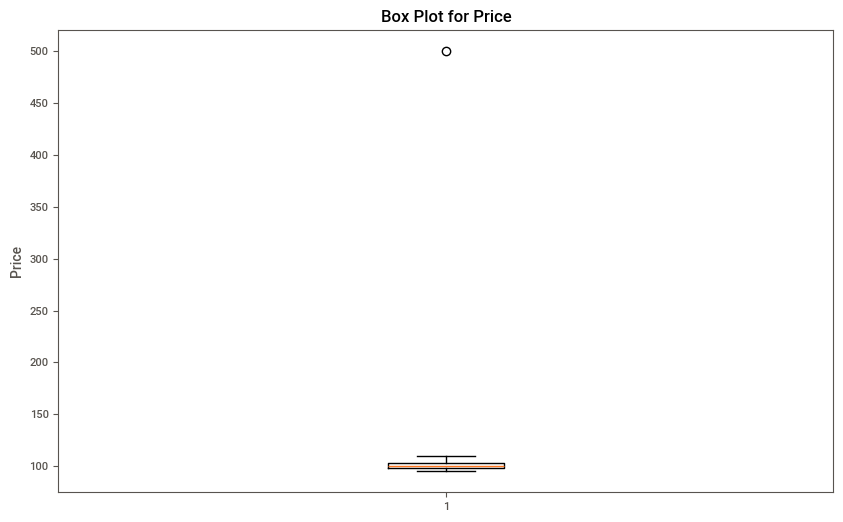

In [51]:
# Box plot
plt.figure(figsize=(10, 6))
plt.boxplot(df['Price'])
plt.title('Box Plot for Price')
plt.ylabel('Price')
plt.show()

#### b. Z-score

In [53]:
import pandas as pd
import numpy as np
# Sample financial data
data = {'Price': [100, 95, 96, 101, 103, 98, 99, 500,
103, 110]}
df = pd.DataFrame(data)
df

,Price
0,100
1,95
2,96
3,101
4,103
5,98
6,99
7,500
8,103
9,110


In [54]:
# Calculate Z-scores 
df['Z_score'] = (df['Price'] - df['Price'].mean()) / df['Price'].std()
# Identify outliers
outliers = df[np.abs(df['Z_score']) > 2] #표준편차 +/-2 값 이상을 이상치로 
print("Outliers using Z-score method:")
print(outliers)

Outliers using Z-score method:
   Price   Z_score
7    500  2.844444


#### b. IQR

In [56]:
import pandas as pd
import numpy as np
# Sample financial data
data = {'Price': [100, 95, 96, 101, 103, 98, 99, 500,
103, 110]}
df = pd.DataFrame(data)
df

,Price
0,100
1,95
2,96
3,101
4,103
5,98
6,99
7,500
8,103
9,110


In [57]:
# Calculate IQR (사분위수)
Q1 = df['Price'].quantile(0.25) 
Q3 = df['Price'].quantile(0.75)
IQR = Q3 - Q1
# Identify outliers
outliers = df[(df['Price'] < (Q1 - 1.5 * IQR)) | (df['Price'] > (Q3 + 1.5 * IQR))]
print("Outliers using IQR method:")
print(outliers)


Outliers using IQR method:
   Price
7    500


| 기준  | Z-score 방식  | IQR 방식  (박스플롯) |
|------------|-----------------------------|----------------------------------------|
| 가정       | 정규분포 기반               | 분포 가정 없음                         |
| 이상치 정의 | 평균 ± 2~3σ 밖              | 사분위 범위 밖 (1.5×IQR 기준)          |
| 민감도     | 이상치에 민감               | 상대적으로 강인(robust)               |
| 실무 활용  | 연속형 정규형 변수          | 비대칭/스케일 민감 변수               |


### 3. Feature Engineering
- 데이터에서 모델이 학습하기 좋은 형태의 피처(Feature)를 생성, 변형, 선택하는 작업

In [58]:
import pandas as pd
import numpy as np
# Set random seed for reproducibility
np.random.seed(42)
# Generate synthetic financial data
n_samples = 1000
data = {
    'Date': pd.date_range(start='1/1/2023',
periods=n_samples, freq='D'),
    'Open': np.random.uniform(100, 500, size=n_samples),
    'High': np.random.uniform(100, 500, size=n_samples),
    'Low': np.random.uniform(100, 500, size=n_samples),
    'Close': np.random.uniform(100, 500,
size=n_samples),
    'Volume': np.random.randint(1000, 100000,
size=n_samples)
}
# Create a DataFrame
df = pd.DataFrame(data)
df

,Date,Open,High,Low,Close,Volume
0,2023-01-01,249.816048,174.053172,204.682273,369.081198,22097
1,2023-01-02,480.285723,316.760379,198.791520,418.672559,4092
2,2023-01-03,392.797577,449.178334,462.501832,200.187160,54311
3,2023-01-04,339.463394,392.889955,199.818480,349.949640,23692
4,2023-01-05,162.407456,422.624459,208.779890,328.698393,24862
...,...,...,...,...,...,...
995,2025-09-22,136.632829,362.782063,446.118304,276.842814,17766
996,2025-09-23,466.925430,482.645848,162.909283,233.760472,94922
997,2025-09-24,154.727452,127.583207,223.915144,257.828926,12695
998,2025-09-25,480.094942,122.821888,216.018213,311.976235,18796


In [59]:
# Calculate moving averages
df['MA5'] = df['Close'].rolling(window=5).mean() # 5-day moving average
df['MA10'] = df['Close'].rolling(window=10).mean() # 10-day moving average
df

,Date,Open,High,Low,Close,Volume,MA5,MA10
0,2023-01-01,249.816048,174.053172,204.682273,369.081198,22097,NaN,NaN
1,2023-01-02,480.285723,316.760379,198.791520,418.672559,4092,NaN,NaN
2,2023-01-03,392.797577,449.178334,462.501832,200.187160,54311,NaN,NaN
3,2023-01-04,339.463394,392.889955,199.818480,349.949640,23692,NaN,NaN
4,2023-01-05,162.407456,422.624459,208.779890,328.698393,24862,333.317790,NaN
...,...,...,...,...,...,...,...,...
995,2025-09-22,136.632829,362.782063,446.118304,276.842814,17766,255.962444,251.464710
996,2025-09-23,466.925430,482.645848,162.909283,233.760472,94922,265.824462,261.026320
997,2025-09-24,154.727452,127.583207,223.915144,257.828926,12695,237.192781,258.806868
998,2025-09-25,480.094942,122.821888,216.018213,311.976235,18796,275.484520,266.506320


### 4. Feature Scaling (스케일링)
- 성능, 학습 속도, 수렴 안정성을 높이기 위해 필수적
- 데이터의 각 피처(변수) 값의 범위를 일정한 기준으로 맞춰주는 작업

* 거리 기반 모델은 스케일에 민감
- 예: KNN, K-Means, SVM, PCA 등
- 어떤 피처는 값의 범위가 크고, 어떤 건 작으면, 범위가 큰 피처가 모델을 지배함

#### a. Normalization

In [60]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
# Sample data
data = {
    'Feature1': [.4, .2, .1, .9, .6],
    'Feature2': [90, 101, 95, 94, 102],
    'Feature3': [9000, 10100, 9500, 9400, 10200]
}
df = pd.DataFrame(data)
df

,Feature1,Feature2,Feature3
0,0.4,90,9000
1,0.2,101,10100
2,0.1,95,9500
3,0.9,94,9400
4,0.6,102,10200


In [61]:
# Initialize the MinMaxScaler
scaler = MinMaxScaler()
# Fit and transform the data
normalized_data = scaler.fit_transform(df)
# Convert the normalized data back to a DataFrame
normalized_df = pd.DataFrame(normalized_data,
columns=df.columns)
# Display the normalized DataFrame
print("Normalized DataFrame:")
print(normalized_df)

Normalized DataFrame:
   Feature1  Feature2  Feature3
0     0.375  0.000000  0.000000
1     0.125  0.916667  0.916667
2     0.000  0.416667  0.416667
3     1.000  0.333333  0.333333
4     0.625  1.000000  1.000000


#### b. Standardization 
- Z-score Scaling

In [62]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
# Sample data
data = {
    'Feature1': [.4, .2, .1, .9, .6],
    'Feature2': [90, 101, 95, 94, 102],
    'Feature3': [9000, 10100, 9500, 9400, 10200]
}
df = pd.DataFrame(data)
df

,Feature1,Feature2,Feature3
0,0.4,90,9000
1,0.2,101,10100
2,0.1,95,9500
3,0.9,94,9400
4,0.6,102,10200


In [63]:
# Initialize the StandardScaler
scaler = StandardScaler()
# Fit and transform the data
standardized_data = scaler.fit_transform(df)
# Convert the standardized data back to a DataFrame
standardized_df = pd.DataFrame(standardized_data,columns=df.columns)
# Display the standardized DataFrame
print("Standardized DataFrame:")
print(standardized_df)

Standardized DataFrame:
   Feature1  Feature2  Feature3
0 -0.139347 -1.422574 -1.422574
1 -0.836080  1.022475  1.022475
2 -1.184446 -0.311188 -0.311188
3  1.602486 -0.533465 -0.533465
4  0.557386  1.244752  1.244752


#### 추가 
| 구분             | 방식              | 수식                                | 결과 범위        | 이상치 민감도    | 분포 가정        | 주요 사용처                           |
|------------------|-------------------|-------------------------------------|-------------------|------------------|------------------|----------------------------------------|
| Normalization    | Min-Max Scaling   | (x - min) / (max - min)             | [0, 1] 또는 [-1, 1] | 매우 민감        | 없음             | 신경망, KNN 등 거리 기반 모델          |
| Standardization  | Z-score Scaling   | (x - mean) / std                    | 평균 0, 표준편차 1 | 중간             | 정규분포일 때 적합 | 회귀, SVM, PCA 등                     |
| RobustScaler     | IQR Scaling       | (x - Q1) / (Q3 - Q1)                | 제한 없음         | **강인함(robust)** | 없음             | 이상치 많은 데이터, 트리 기반 제외     |
| MaxAbsScaler     | Max-Abs Scaling   | x / max(abs(x))                     | [-1, 1]            | **민감**          | 없음             | 희소 행렬(sparse), 음수 포함된 데이터 |



| 상황                               | 추천                           |
| -------------------------------- | ---------------------------- |
| 값이 0\~1 범위로 제한돼야 하는 경우 (이미지, NN) | **Normalization**            |
| 이상치가 있거나 통계 기반 모델을 쓸 경우          | **Standardization**          |
| 모델이 `거리`에 민감하다면 (KNN, SVM 등)     | 보통 **Standardization**이 더 좋음 |


### 5. Time Series Data - Stationary (시계열데이터-정상화)
- 평균, 분산, 자기상관 등 통계적 특성이 시간에 따라 일정한 시계열 을 "정상 시계열"
- 비정상 시계열을 모델링하면 패턴 인식 및 예측 정확도가 낮아질수 있음

왜 정상화를 해야하는지? 
- 시계열 모델(AR, MA, ARIMA 등)은 정상성을 전제

정상화 방법으로는 
- 1. 차분 (differencing)
- 2. 추세 제거 (de-trending)
- 3. 로그 변환 (log transformation)

| 방법    | 목적                     | 대표 상황             | 변환 방식      |
| ----- | ---------------------- | ----------------- | ---------- |
| 차분    | 평균이 시간에 따라 변할 때        | 추세가 있는 시계열        | 현재 - 이전 시점 |
| 추세 제거 | 선형 또는 곡선 형태의 추세 제거     | 명확한 상승/하락 추세      | 시계열 - 추세선  |
| 로그 변환 | 분산 안정화, 곱셈 → 덧셈 관계로 변환 | 지수 성장, 변동성 증가 시계열 | 로그 함수 적용   |


In [64]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt

# Generate sample non-stationary data
np.random.seed(42)
time_series = np.random.randn(100).cumsum() # 평균 0, 표준편차 1의 정규분포를 따르는 랜덤값 100개 생성, 누적합(cumulative sum) 때문에, 앞에서부터 계속 더해감, 시간 흐룰수록 평균이 변함
time_series

array([  0.49671415,   0.35844985,   1.00613839,   2.52916825,
         2.29501487,   2.06087791,   3.64009073,   4.40752546,
         3.93805107,   4.48061112,   4.01719342,   3.55146367,
         3.79342594,   1.8801457 ,   0.15522787,  -0.40705966,
        -1.41989078,  -1.10564345,  -2.01366753,  -3.42597123,
        -1.96032246,  -2.18609876,  -2.11857056,  -3.54331874,
        -4.08770147,  -3.97677888,  -5.12777245,  -4.75207444,
        -5.35271313,  -5.64440688,  -6.24611349,  -4.3938353 ,
        -4.40733253,  -5.46504346,  -4.64249854,  -5.86334219,
        -5.6544786 ,  -7.61414872,  -8.94233477,  -8.74547354,
        -8.00700696,  -7.83563868,  -7.95128696,  -8.25239065,
        -9.73091264, -10.45075685, -10.91139562,  -9.8542734 ,
        -9.51065511, -11.27369526, -10.94961129, -11.33469357,
       -12.01161557, -11.39993929, -10.36893976,  -9.43765964,
       -10.27687717, -10.58608954, -10.25482611,  -9.27928098,
        -9.75845522,  -9.9441142 , -11.05044917, -12.24

#### 정상성 검증 테스트 
- Augmented Dickey-Fuller (ADF)
- H0(귀무가설) : 데이터는 비정상이다
- H1(대립가설) : 데이터는 정상이다. 

* p-value < 0.05 ; H0(귀무가설) 기각 --> 정상
* p-value > 0.05 ; H0(귀무가설) 채택 --> 비정상

In [65]:
# Perform ADF test
result = adfuller(time_series)
print('ADF Statistic:', result[0])
print('p-value:', result[1])
for key, value in result[4].items():
    print('Critical Values:')
    print(f'   {key}, {value}')
    
# p-value: 0.60 ; 비정상

ADF Statistic: -1.3583317659818992
p-value: 0.6020814791099098
Critical Values:
   1%, -3.498198082189098
Critical Values:
   5%, -2.891208211860468
Critical Values:
   10%, -2.5825959973472097


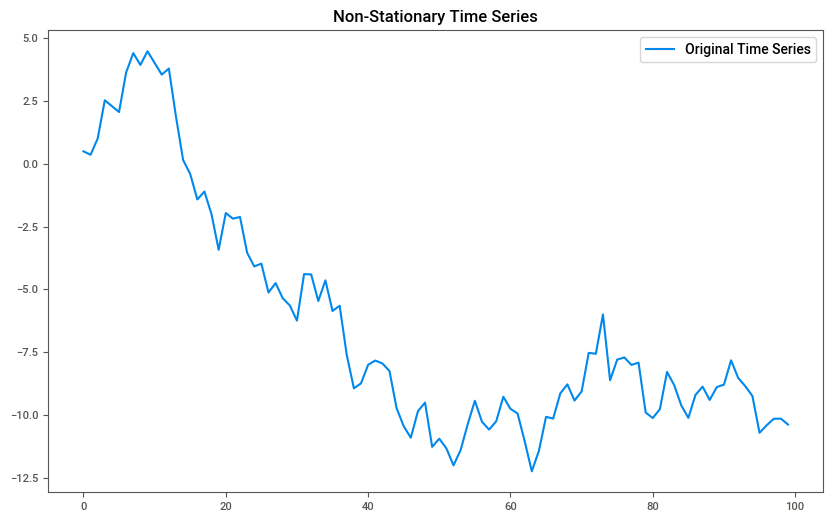

In [66]:
# Plot the time series
plt.figure(figsize=(10, 6))
plt.plot(time_series, label='Original Time Series')
plt.title('Non-Stationary Time Series')
plt.legend()
plt.show()

#딱 봐도 추세 존재, 평균 이 일정하지 않음


- 차분을 통한 정상화 시도 (현재값 - 전값)

In [67]:
# Differencing to make the series stationary
diff_series = np.diff(time_series, n=1)
diff_series

array([-0.1382643 ,  0.64768854,  1.52302986, -0.23415337, -0.23413696,
        1.57921282,  0.76743473, -0.46947439,  0.54256004, -0.46341769,
       -0.46572975,  0.24196227, -1.91328024, -1.72491783, -0.56228753,
       -1.01283112,  0.31424733, -0.90802408, -1.4123037 ,  1.46564877,
       -0.2257763 ,  0.0675282 , -1.42474819, -0.54438272,  0.11092259,
       -1.15099358,  0.37569802, -0.60063869, -0.29169375, -0.60170661,
        1.85227818, -0.01349722, -1.05771093,  0.82254491, -1.22084365,
        0.2088636 , -1.95967012, -1.32818605,  0.19686124,  0.73846658,
        0.17136828, -0.11564828, -0.3011037 , -1.47852199, -0.71984421,
       -0.46063877,  1.05712223,  0.34361829, -1.76304016,  0.32408397,
       -0.38508228, -0.676922  ,  0.61167629,  1.03099952,  0.93128012,
       -0.83921752, -0.30921238,  0.33126343,  0.97554513, -0.47917424,
       -0.18565898, -1.10633497, -1.19620662,  0.81252582,  1.35624003,
       -0.07201012,  1.0035329 ,  0.36163603, -0.64511975,  0.36

In [68]:
# Perform ADF test on differenced series
result_diff = adfuller(diff_series)
print('ADF Statistic (Differenced):', result_diff[0])
print('p-value (Differenced):', result_diff[1])
for key, value in result_diff[4].items():
    print('Critical Values (Differenced):')
    print(f'   {key}, {value}')
    
# p-value < 0.05 ; 정상화

ADF Statistic (Differenced): -10.008881137130237
p-value (Differenced): 1.8006877207195537e-17
Critical Values (Differenced):
   1%, -3.4989097606014496
Critical Values (Differenced):
   5%, -2.891516256916761
Critical Values (Differenced):
   10%, -2.5827604414827157


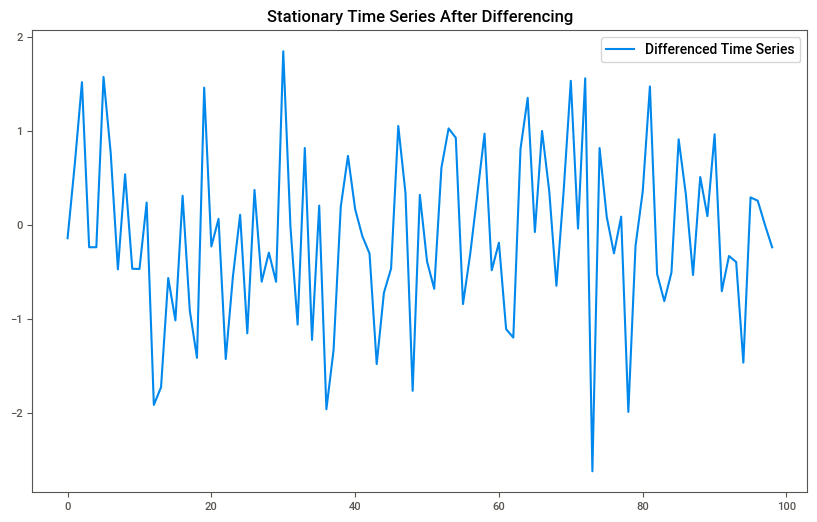

In [69]:
# Plot the differenced time series
plt.figure(figsize=(10, 6))
plt.plot(diff_series, label='Differenced Time Series')
plt.title('Stationary Time Series After Differencing')
plt.legend()
plt.show()

#### 책에 따르면, 금융에서는 과도한 차분을 피하면서 신호의 메모리를 유지하기 위해 Lopez de Prado가 제안한 분수 차분(Fractional Differentiation) 기법이 권장한다고함

- 금융 시계열 데이터는 보통 비정상임. 
- 하지만 일반 차분은 데이터를 많이 바꿔서, 금융데이터에서 중요한 시그널 (추세, 패턴)까지 모두 날려버릴수 있음.
- 그래서 로페즈의 아이디어는 "정상성을 얻으면서도, 데이터의 메모리를 유지할수 있을까...? "
- "차분의 정도를 정수가 아니라 예를들어 (1,2) 가 아니라 (0.4,0.6) 으로 해보자. 
- 즉 최근 값에 더 많이 두자. 
- 그러면 정상성도 어느정도 확보하고, 금융데이터에 중요한 추세를 완전히 제거하지는 않음. 

In [100]:
def get_weights_ffd(d, thres): 
    '''
    Computing the weights for differentiating the series with fixed window size
    
        Parameters:
            d (float): differentiating factor
            thres (float): threshold for cutting off weights
            
        Returns:
            w (np.ndarray): array containing weights
    '''
    w, k = [1.0], 1 # 초기값 설정: w_0 = 1
    while True:  # 재귀식으로 다음 weight 계산
        w_ = -w[-1] / k * (d - k + 1)
        if abs(w_) < thres:
            break
        w.append(w_)
        k += 1
    w = np.array(w[::-1]).reshape(-1, 1)
    return w


def frac_diff_ffd(series, d, thres=1e-5):
    '''
    Fractional differentiation with constant width window
    Note 1: thres determines the cut-off weight for the window
    Note 2: d can be any positive fractional, not necessarily bounded [0,1]
        
        Parameters:
            series (pd.DataFrame): dataframe with times eries
            d (float): differentiating factor
            thres (float): threshold for cutting off weights
        
         Returns: 
            df (pd.DataFrame): dataframe with differentiated series
    '''
    
    w = get_weights_ffd(d, thres)
    width = len(w) - 1
    df = {}
    for name in series.columns:
        series_f = series[[name]].ffill().dropna()
        df_ = pd.Series(index=np.arange(series.shape[0]), dtype=object)
        for iloc1 in range(width, series_f.shape[0]):
            loc0, loc1 = series_f.index[iloc1 - width], series_f.index[iloc1]
            if not np.isfinite(series.loc[loc1, name]):
                continue    # exclude NAs
            df_[loc1] = np.dot(w.T, series_f.loc[loc0:loc1])[0, 0]
        df[name] = df_.dropna().copy(deep=True)
    df = pd.concat(df, axis=1)
    return df

def ffd(process, thres=0.01):
    '''
    Finding the minimum differentiating factor that passes the ADF test
        
        Parameters:
            process (np.ndarray): array with random process values
            apply_constant_width (bool): flag that shows whether to use 
            constant width window (if True) or increasing width window
            (if False)
            thres (float): threshold for cutting off weights '''
    for d in np.linspace(0, 1, 11):# 0.0부터 1.0까지 0.1 간격으로
        process_diff = frac_diff_ffd(pd.DataFrame(process), d, thres)
        test_results = adfuller(process_diff[process.name], maxlag=1, regression='c', autolag=None)
        if test_results[1] <= 0.05: # p-value ≤ 0.05면 정상성 확보 → 종료
            break
    return process_diff[process.name]

In [101]:
# Generate sample non-stationary data
np.random.seed(42)
time_series = np.random.randn(100).cumsum()

In [102]:
# Perform ADF test
result = adfuller(time_series)
print('ADF Statistic:', result[0])
print('p-value:', result[1])
for key, value in result[4].items():
    print('Critical Values:')
    print(f'   {key}, {value}')

ADF Statistic: -1.3583317659818992
p-value: 0.6020814791099098
Critical Values:
   1%, -3.498198082189098
Critical Values:
   5%, -2.891208211860468
Critical Values:
   10%, -2.5825959973472097


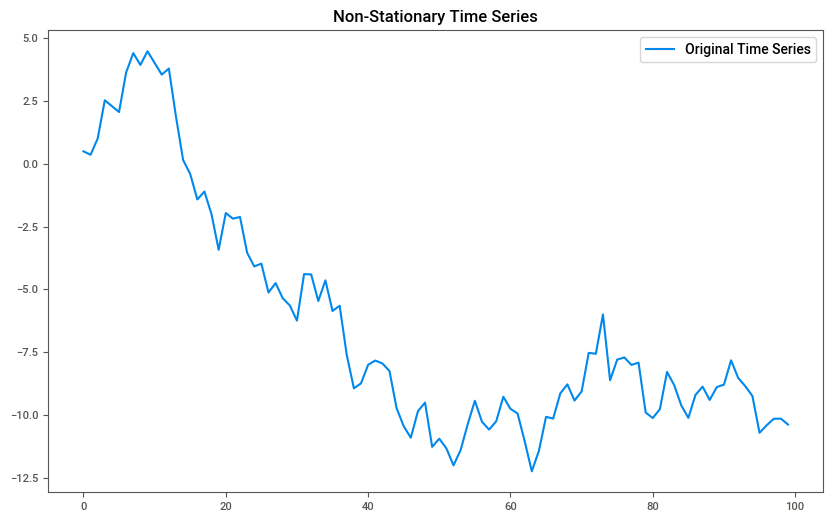

In [103]:
# Plot the time series
plt.figure(figsize=(10, 6))
plt.plot(time_series, label='Original Time Series')
plt.title('Non-Stationary Time Series')
plt.legend()
plt.show()

In [104]:
# Differencing to make the series stationary
diff_series = ffd(pd.Series(time_series, name='time_series'))

In [105]:
# Perform ADF test on differenced series
result_diff = adfuller(diff_series)
print('ADF Statistic (Differenced):', result_diff[0])
print('p-value (Differenced):', result_diff[1])
for key, value in result_diff[4].items():
    print('Critical Values (Differenced):')
    print(f'   {key}, {value}')


ADF Statistic (Differenced): -3.614042461855659
p-value (Differenced): 0.0054981717565326035
Critical Values (Differenced):
   1%, -3.506057133647011
Critical Values (Differenced):
   5%, -2.8946066061911946
Critical Values (Differenced):
   10%, -2.5844100201994697


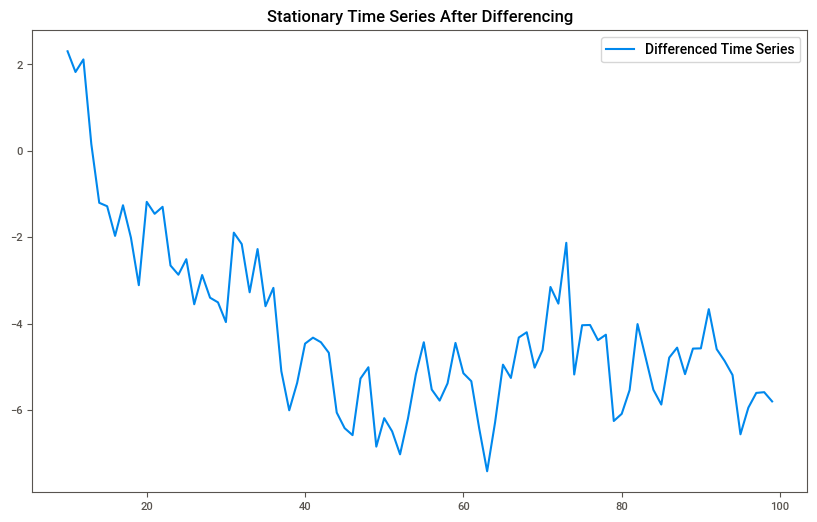

In [109]:
# Plot the differenced time series
plt.figure(figsize=(10, 6))
plt.plot(diff_series, label='Differenced Time Series')
plt.title('Stationary Time Series After Differencing')
plt.legend()
plt.show()

### 6. Time Series Data - Cointegrated (시계열데이터-공적분)
- 두 개 이상의 비정상 시계열이 선형 결합을 통해 정상 시계열을 형성할 수 있다면, 이는 안정적인 장기 균형 관계를 의미하며 공적분되었다고 말합니다.
- Engle-Granger 테스트는 공적분을 검정하기 위한 널리 사용되는 방법으로, 평균회귀 행동을 보이는 자산 쌍을 식별하여 절대 가격이 아닌 두 자산 간의 상대적 움직임에 베팅할 수 있도록 합니다.

* ADF는 단일 시계열 정상화 테스트
* Engle-Granger 는 스프레드 시계열에 정상화 테스트 
즉, 자산 A와 B는 비정상 시계열이지만, spread가 정상화이면 두 자산은 공적분 관계가 있다. 

In [148]:
import numpy as np
import pandas as pd
from statsmodels.tsa.stattools import adfuller, coint
import matplotlib.pyplot as plt
# Generate synthetic time series data
np.random.seed(42)
n = 100
time = np.arange(n)
# Simulate two non-stationary series (random walks)
asset1 = np.cumsum(np.random.randn(n)) + 41
asset2 = asset1 + np.random.randn(n)
# Create a DataFrame
data = pd.DataFrame({'asset1': asset1, 'asset2':asset2})
data

,asset1,asset2
0,41.496714,40.081343
1,41.358450,40.937805
2,42.006138,41.663424
3,43.529168,42.726891
4,43.295015,43.133729
...,...,...
95,30.287646,30.672964
96,30.583767,29.699909
97,30.844822,30.998547
98,30.849935,30.908144


In [149]:
# Function to perform ADF test
def adf_test(series, name):
    result = adfuller(series)
    print(f'ADF Statistic for {name}: {result[0]}')
    print(f'p-value for {name}: {result[1]}')
    for key, value in result[4].items():
        print(f'Critical Value {key}: {value}')
    print('\n')
    
# Step 1: Test each series for stationarity
print("ADF Test for asset1:") # 비정상
adf_test(data['asset1'], 'asset1') 
print("ADF Test for asset2:") # 비정상
adf_test(data['asset2'], 'asset2')

ADF Test for asset1:
ADF Statistic for asset1: -1.3583317659818994
p-value for asset1: 0.6020814791099097
Critical Value 1%: -3.498198082189098
Critical Value 5%: -2.891208211860468
Critical Value 10%: -2.5825959973472097


ADF Test for asset2:
ADF Statistic for asset2: -1.6423781426657948
p-value for asset2: 0.46101841601670773
Critical Value 1%: -3.5019123847798657
Critical Value 5%: -2.892815255482889
Critical Value 10%: -2.583453861475781




In [150]:
# Step 2: Perform the Engle-Granger cointegration test # 스프레드는 정상
score, pvalue, _ = coint(data['asset1'], data['asset2'])
print(f'Engle-Granger Cointegration Test score:{score}')
print(f'Engle-Granger Cointegration Test p-value:{pvalue}\n')

Engle-Granger Cointegration Test score:-10.546923889518599
Engle-Granger Cointegration Test p-value:1.0672395686754612e-17



| 방식                          | 설명                                | ADF 대상 |
| --------------------------- | --------------------------------- | ------ |
| `coint(asset1, asset2)`     | Engle-Granger 방식: 회귀 후 잔차에 ADF 수행 | 회귀 잔차  |
| `adf_test(asset1 - asset2)` | 단순 스프레드의 정상성 확인                   | 단순 차   |


In [151]:
# Step 3: Visualize the series and their spread
data['spread'] = data['asset1'] - data['asset2']
data

,asset1,asset2,spread
0,41.496714,40.081343,1.415371
1,41.358450,40.937805,0.420645
2,42.006138,41.663424,0.342715
3,43.529168,42.726891,0.802277
4,43.295015,43.133729,0.161286
...,...,...,...
95,30.287646,30.672964,-0.385317
96,30.583767,29.699909,0.883857
97,30.844822,30.998547,-0.153725
98,30.849935,30.908144,-0.058209


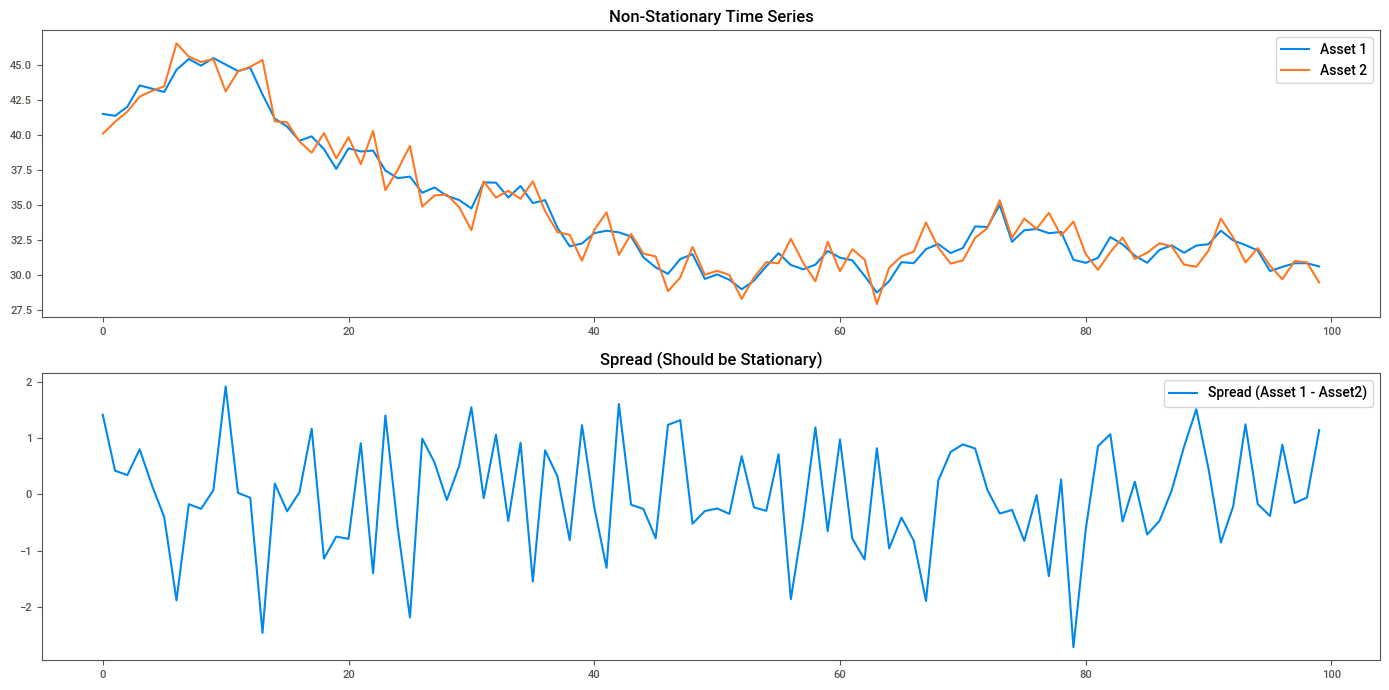

In [154]:
plt.figure(figsize=(14, 7))
plt.subplot(2, 1, 1)
plt.plot(data['asset1'], label='Asset 1')
plt.plot(data['asset2'], label='Asset 2')
plt.legend()
plt.title('Non-Stationary Time Series')

plt.subplot(2, 1, 2)
plt.plot(data['spread'], label='Spread (Asset 1 - Asset2)')
plt.legend()
plt.title('Spread (Should be Stationary)')
plt.tight_layout()
plt.show()

In [155]:
# Step 4: Test the spread for stationarity
print("ADF Test for spread:")
adf_test(data['spread'], 'spread') # 단순 스프레드 가지고 정상성 테스트


ADF Test for spread:
ADF Statistic for spread: -10.875458876565842
p-value for spread: 1.3352313844030576e-19
Critical Value 1%: -3.498198082189098
Critical Value 5%: -2.891208211860468
Critical Value 10%: -2.5825959973472097




| 방식                          | 설명                                | ADF 대상 |
| --------------------------- | --------------------------------- | ------ |
| `coint(asset1, asset2)`     | Engle-Granger 방식: 회귀 후 잔차에 ADF 수행 | 회귀 잔차  |
| `adf_test(asset1 - asset2)` | 단순 스프레드의 정상성 확인                   | 단순 차   |


In [158]:
import numpy as np
import pandas as pd
from statsmodels.tsa.stattools import adfuller, coint
import matplotlib.pyplot as plt
from hurst import compute_Hc


In [159]:
# Generate synthetic cointegrated time series data
np.random.seed(42)
n = 1000  # Number of data points
time = np.arange(n)

In [161]:
# Generate a common stochastic trend
trend = np.cumsum(np.random.randn(n))
# Create two cointegrated series with added noise
asset1 = trend + 0.3 * np.random.randn(n)
asset2 = trend + 0.1 * np.random.randn(n)
# Create a DataFrame
data = pd.DataFrame({'asset1': asset1, 'asset2':asset2})
data


,asset1,asset2
0,-2.166856,-1.950184
1,-2.777554,-2.813534
2,-3.176393,-3.361362
3,-1.152321,-1.327119
4,-1.147615,-0.664274
...,...,...
995,-18.339824,-18.307987
996,-20.189523,-20.287681
997,-19.789371,-20.844984
998,-18.837455,-19.033071


In [162]:
# Function to perform ADF test
def adf_test(series, name):
    result = adfuller(series)
    print(f'ADF Statistic for {name}: {result[0]}')
    print(f'p-value for {name}: {result[1]}')
    for key, value in result[4].items():
        print(f'Critical Value {key}: {value}')
    print('\n')
# Test each series for stationarity
print("ADF Test for asset1:")
adf_test(data['asset1'], 'asset1')
print("ADF Test for asset2:")
adf_test(data['asset2'], 'asset2')

ADF Test for asset1:
ADF Statistic for asset1: -1.593321966917196
p-value for asset1: 0.4869472400856826
Critical Value 1%: -3.4369259442540416
Critical Value 5%: -2.8644432969122833
Critical Value 10%: -2.5683158550174094


ADF Test for asset2:
ADF Statistic for asset2: -1.760827547517869
p-value for asset2: 0.4000757244772611
Critical Value 1%: -3.4369127451400474
Critical Value 5%: -2.864437475834273
Critical Value 10%: -2.568312754566378




In [164]:
# Perform the Engle-Granger cointegration test
score, pvalue, _ = coint(data['asset1'], data['asset2'])
print(f'Engle-Granger Cointegration Test score: {score}')
print(f'Engle-Granger Cointegration Test p-value: {pvalue}\n')


Engle-Granger Cointegration Test score: -32.34218923385833
Engle-Granger Cointegration Test p-value: 0.0



In [165]:
# Calculate the spread
data['spread'] = data['asset1'] - data['asset2']

# Step 4: Test the spread for stationarity
print("ADF Test for spread:")
adf_test(data['spread'], 'spread')

ADF Test for spread:
ADF Statistic for spread: -32.31627784854452
p-value for spread: 0.0
Critical Value 1%: -3.4369127451400474
Critical Value 5%: -2.864437475834273
Critical Value 10%: -2.568312754566378




In [168]:
# Remove zero and negative values in the spread for Hurst calculation
spread_non_zero = data['spread'][data['spread'] > 0]

if len(spread_non_zero) < len(data['spread']):
    print("Warning: Non-positive values in spread were removed for Hurst calculation.")


Hurst Exponent for spread: 0.33920501377666173


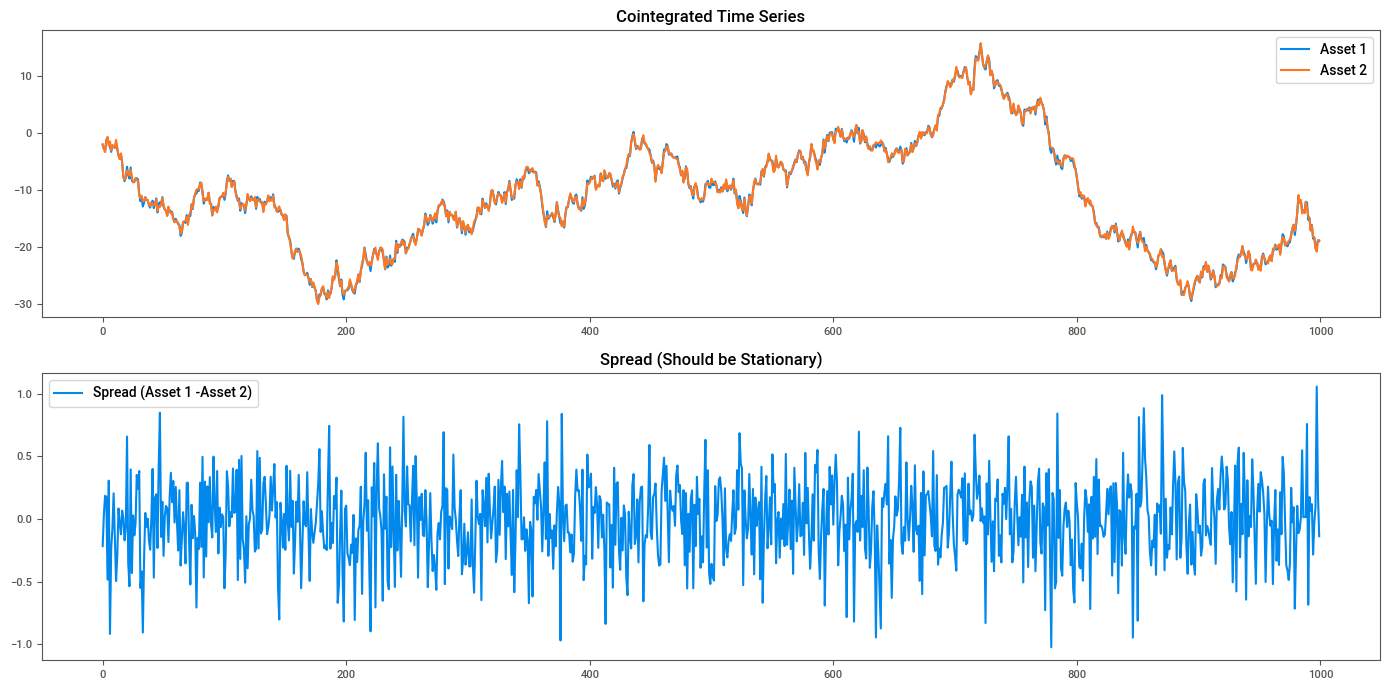

In [169]:
# Ensure spread_non_zero is not empty and does not contain invalid values
if len(spread_non_zero) > 0 and (spread_non_zero <=0).sum() == 0:
    # Calculate the Hurst exponent of the spread
    H, c, data_hurst = compute_Hc(spread_non_zero, kind='price', simplified=True)
    print(f'Hurst Exponent for spread: {H}')
    # Visualize the series and their spread
    plt.figure(figsize=(14, 7))
    plt.subplot(2, 1, 1)
    plt.plot(data['asset1'], label='Asset 1')
    plt.plot(data['asset2'], label='Asset 2')
    plt.legend()
    plt.title('Cointegrated Time Series')
    plt.subplot(2, 1, 2)
    plt.plot(data['spread'], label='Spread (Asset 1 -Asset 2)')
    plt.legend()
    plt.title('Spread (Should be Stationary)')
    plt.tight_layout()
    plt.show()
else:
    print("Error: Spread contains invalid values or is empty after removing non-positive values.")

시계열의 장기 기억 성질을 0에서 1 사이의 값으로 측정하는 **허스트 지수(Hurst coefficient)**는 코인티그레이션된 시계열의 특성에 대해 추가적인 통찰을 제공할 수 있다:

- H < 0.5: 시계열은 평균회귀(mean-reverting) 성향을 보인다. 즉, 시계열이 진동할 수는 있지만 결국에는 장기 평균으로 돌아오는 경향이 있다.
- H = 0.5: 시계열은 장기 기억이 없으며 랜덤워크처럼 행동한다.
- H > 0.5: 시계열은 한 방향으로 강한 추세를 따른다.

Hurst Exponent for spread: 0.33920501377666173

- 스프레드의 허스트 지수가 0.5보다 낮다는 말은, 강한 평균회귀 특성을 나타내며, 페어 트레이딩 가능하다.
- 고평가 매도/저평가 매수

| Hurst 계수 $H$    | 장기 메모리 해석    | 설명                                 |
| --------------- | ------------ | ---------------------------------- |
| $H < 0.5$       | 없음 (음의 자기상관) | 평균회귀적, 시계열이 자주 방향을 바꿈              |
| $H \approx 0.5$ | 없음 (무기억 과정)  | 무작위 보행(Random Walk), 과거가 미래에 영향 없음 |
| $H > 0.5$       | 있음 (양의 자기상관) | 장기 메모리 존재, 현재 방향성이 오래 지속됨          |


* 장기 메모리 : 과거의 정보가 아주 오랫동안 미래에 영향을 미치는 성질을 의미해.

## Feature Selection (피쳐 선택) ; 쓸만한 피쳐 고르기
1. Correlation Analysis
2. Feature Importance Analysis
3. Auto-identification of Features
4. Dimensionality Reduction/Principal Component Analysis (차원축소-PCA)

### 1. Correlation Analysis
- 높은 상관관계가 있다면, 피쳐 제거

In [70]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Generate random sample data with correlations
np.random.seed(42)
size = 100
feature1 = np.random.randn(size)
feature2 = feature1 + np.random.randn(size) * 0.1 # Highly correlated with feature1
feature3 = np.random.randn(size)
target = feature1 * 0.5 + np.random.randn(size) * 0.1 # Highly correlated with target
data = {
    'Feature1': feature1,
    'Feature2': feature2,
    'Feature3': feature3,
    'Target': target
}
df = pd.DataFrame(data)
df

,Feature1,Feature2,Feature3,Target
0,0.496714,0.355177,0.357787,0.165458
1,-0.138264,-0.180329,0.560785,-0.125150
2,0.647689,0.613417,1.083051,0.398574
3,1.523030,1.442802,1.053802,0.822552
4,-0.234153,-0.250282,-1.377669,-0.119167
...,...,...,...,...
95,-1.463515,-1.424983,-0.692910,-0.778675
96,0.296120,0.207735,0.899600,-0.023253
97,0.261055,0.276428,0.307300,0.265915
98,0.005113,0.010934,0.812862,-0.008897


In [72]:
# Calculate correlation matrix
corr_matrix = df.corr()
# Display correlation matrix
print(corr_matrix)

          Feature1  Feature2  Feature3    Target
Feature1  1.000000  0.994477  0.190840  0.980875
Feature2  0.994477  1.000000  0.188663  0.974603
Feature3  0.190840  0.188663  1.000000  0.193556
Target    0.980875  0.974603  0.193556  1.000000


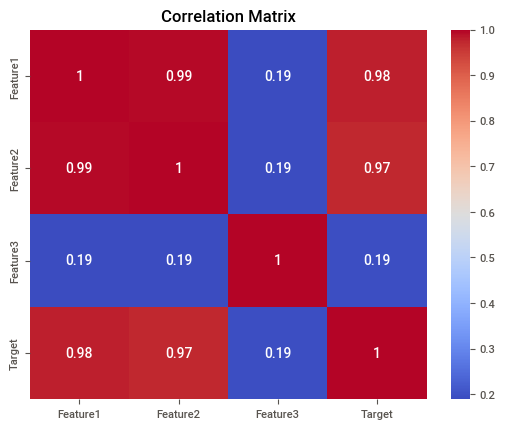

In [73]:
# Plot heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

### 2. Feature Importance Analysis
- 트리 모델 기반
- 트리 모델의 분류 지표인 Information Gain (IG) 기준으로 중요 피쳐 선정
- 높을 수록 모델 예측에 중요


In [111]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# Generate random sample data with correlations
np.random.seed(42)
size = 100
feature1 = np.random.randn(size)
feature2 = feature1 + np.random.randn(size) * 0.1 # Highly correlated with feature1
feature3 = np.random.randn(size)
target = feature1 * 0.5 + np.random.randn(size) * 0.1 # Highly correlated with target
data = {
    'Feature1': feature1,
    'Feature2': feature2,
    'Feature3': feature3,
    'Target': target
}
df = pd.DataFrame(data)
X = df.drop('Target', axis=1)
y = df['Target']
df

,Feature1,Feature2,Feature3,Target
0,0.496714,0.355177,0.357787,0.165458
1,-0.138264,-0.180329,0.560785,-0.125150
2,0.647689,0.613417,1.083051,0.398574
3,1.523030,1.442802,1.053802,0.822552
4,-0.234153,-0.250282,-1.377669,-0.119167
...,...,...,...,...
95,-1.463515,-1.424983,-0.692910,-0.778675
96,0.296120,0.207735,0.899600,-0.023253
97,0.261055,0.276428,0.307300,0.265915
98,0.005113,0.010934,0.812862,-0.008897


In [112]:
# Remove highly correlated features
corr_matrix = X.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)) # 상삼각행열 기준으로, 나머지 nan
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)] # 그러면 피쳐 2 가 0.994로...상삼각으로보면 뒤쪽 컬럼기준으로.
X_reduced = X.drop(columns=to_drop)

In [115]:
corr_matrix

,Feature1,Feature2,Feature3
Feature1,1.000000,0.994477,0.190840
Feature2,0.994477,1.000000,0.188663
Feature3,0.190840,0.188663,1.000000


In [113]:
X_reduced

,Feature1,Feature3
0,0.496714,0.357787
1,-0.138264,0.560785
2,0.647689,1.083051
3,1.523030,1.053802
4,-0.234153,-1.377669
...,...,...
95,-1.463515,-0.692910
96,0.296120,0.899600
97,0.261055,0.307300
98,0.005113,0.812862


In [116]:
# Train a Random Forest model
model = RandomForestRegressor()
model.fit(X_reduced, y)

RandomForestRegressor()

In [117]:
# Get feature importance
importances = model.feature_importances_
feature_names = X_reduced.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Display feature importance
print(importance_df)

    Feature  Importance
0  Feature1    0.984776
1  Feature3    0.015224


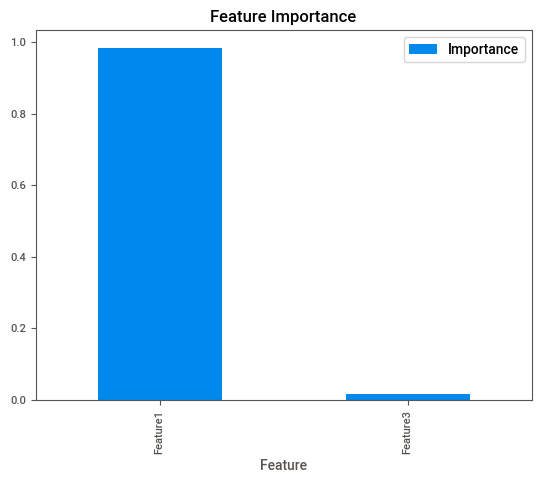

In [118]:
# Plot feature importance
importance_df.sort_values(by='Importance',
ascending=False).plot(kind='bar', x='Feature',
y='Importance')
plt.title('Feature Importance')
plt.show()

### 3. Auto-identification of Features
### Recursive Feature Elimination, RFE) = backward elimination
![이미지 설명](images/rfe%28backward%29.png)


- 피쳐 뻈지만, 성능이 줄지 않았다? --> 필요없는 피쳐

In [119]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
# Generate random sample data with correlations
np.random.seed(42)
size = 100
feature1 = np.random.randn(size)
feature2 = feature1 + np.random.randn(size) * 0.1 # Highly correlated with feature1
feature3 = np.random.randn(size)
target = feature1 * 0.5 + np.random.randn(size) * 0.1 # Highly correlated with targetfeature1
data = {
    'Feature1': feature1,
    'Feature2': feature2,
    'Feature3': feature3,
    'Target': target
}
df = pd.DataFrame(data)
X = df.drop('Target', axis=1)
y = df['Target']
df

,Feature1,Feature2,Feature3,Target
0,0.496714,0.355177,0.357787,0.165458
1,-0.138264,-0.180329,0.560785,-0.125150
2,0.647689,0.613417,1.083051,0.398574
3,1.523030,1.442802,1.053802,0.822552
4,-0.234153,-0.250282,-1.377669,-0.119167
...,...,...,...,...
95,-1.463515,-1.424983,-0.692910,-0.778675
96,0.296120,0.207735,0.899600,-0.023253
97,0.261055,0.276428,0.307300,0.265915
98,0.005113,0.010934,0.812862,-0.008897


In [120]:
# Remove highly correlated features
corr_matrix = X.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]
X_reduced = X.drop(columns=to_drop)


In [121]:
# Apply Recursive Feature Elimination 중요도 낮은 피쳐를 하나씩 제거하면서 성능 비교 (FI 기준)
# 단점은 비용
model = RandomForestRegressor()
rfe = RFE(estimator=model, n_features_to_select=2) # 2개 남을떄까지 
rfe.fit(X_reduced, y)


RFE(estimator=RandomForestRegressor(), n_features_to_select=2)

| 모델 유형       | 예시                                                   | 사용 이유                     |
| ----------- | ---------------------------------------------------- | ------------------------- |
| **회귀**      | `LinearRegression`, `Ridge`, `Lasso`                 | 계수 (`coef_`)로 중요도 판단      |
| **트리**      | `RandomForestRegressor`, `GradientBoostingRegressor` | `feature_importances_` 기반 |
| **SVM**     | `SVR`, `SVC`                                         | `coef_` 또는 커널 기반 중요도 추정   |
| **로지스틱 회귀** | `LogisticRegression`                                 | 분류에서도 RFE 가능 (`coef_` 사용) |


In [122]:
# Get selected features
selected_features = X_reduced.columns[rfe.support_]
print(f'Selected Features: {selected_features}')

Selected Features: Index(['Feature1', 'Feature3'], dtype='object')


In [125]:
importance_df

,Feature,Importance
0,Feature1,1
1,Feature3,1


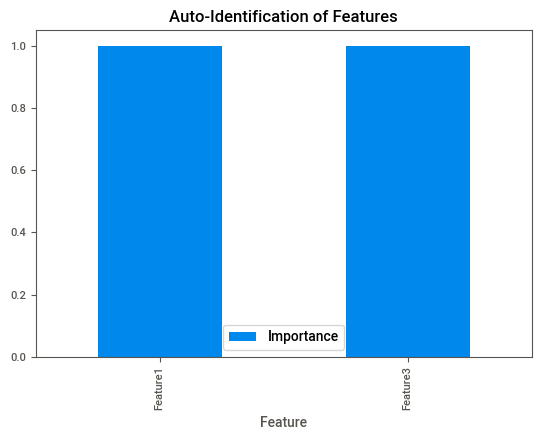

In [123]:
# Plot selected features
importance_df = pd.DataFrame({'Feature':
X_reduced.columns, 'Importance':
rfe.support_.astype(int)})
importance_df.plot(kind='bar', x='Feature',
y='Importance')
plt.title('Auto-Identification of Features')

# Adjust the bottom margin to add more space for x-axis labels
plt.subplots_adjust(bottom=0.2)
plt.show()

### Forward Selection

![이미지 설명](images/forward.png)
![이미지 설명](images/forward2.png)

- 피쳐를 추가 했는데도 성능이 늘어나지 않았다? --> 필요한 피쳐 다 선정했다. 


### 4. Dimensionality Reduction/Principal Component Analysis (차원축소-PCA)
- 축 변환을 이용해 저차원으로
- 단점 : 해석이 어려움

"""
PCA 적용 단계는 다음과 같습니다:

1. 각 특성 쌍 간의 공분산을 계산하여 공분산 행렬 생성
2. 공분산 행렬의 고유벡터(주성분 방향)와 고유값(각 주성분이 설명하는 분산의 양) 계산
3. 고유값을 내림차순으로 정렬한 후, 설명하려는 전체 분산의 비율(예:90)을 만족하는 상위 K개의 고유벡터 선택
4. 선택된 상위 K개의 고유벡터로 구성된 특성 행렬(feature matrix) 생성
5. 원본 표준화 데이터를 특성 행렬에 곱하여 새로운 주성분 공간으로 투영
"""

In [128]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Generate random sample data with correlations
np.random.seed(42)
size = 100
feature1 = np.random.randn(size)
feature2 = feature1 + np.random.randn(size) * 0.1 # Highly correlated with feature1
feature3 = np.random.randn(size)
target = feature1 * 0.5 + np.random.randn(size) * 0.1 # Highly correlated with feature1
data = {
    'Feature1': feature1,
    'Feature2': feature2,
    'Feature3': feature3,
    'Target': target
}
df = pd.DataFrame(data)
X = df.drop('Target', axis=1)

df

,Feature1,Feature2,Feature3,Target
0,0.496714,0.355177,0.357787,0.165458
1,-0.138264,-0.180329,0.560785,-0.125150
2,0.647689,0.613417,1.083051,0.398574
3,1.523030,1.442802,1.053802,0.822552
4,-0.234153,-0.250282,-1.377669,-0.119167
...,...,...,...,...
95,-1.463515,-1.424983,-0.692910,-0.778675
96,0.296120,0.207735,0.899600,-0.023253
97,0.261055,0.276428,0.307300,0.265915
98,0.005113,0.010934,0.812862,-0.008897


- PCA는 분산을 기준으로 중요 축을 찾기 떄문에, 스케일링 필요
- 스케일이 다르면, 값이 큰 피처가 주성분으로 지배하기 때문에 안됨

In [129]:
# Standardize the data
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

In [130]:
# Apply PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_standardized)

In [131]:
# Create a DataFrame with the principal components
pca_df = pd.DataFrame(data=principal_components,
columns=['Principal Component 1', 'Principal Component2'])

In [132]:
# Display the explained variance ratio
# PC1(주성분 1)이 전체 데이터 분산의 68.7% 를 설명한다..
print(f'Explained variance ratio: {pca.explained_variance_ratio_}')



Explained variance ratio: [0.68742233 0.3107374 ]


In [134]:
print(pca.components_)

# 즉 3차원 데이터를 2차원으로 줄였는데, 99% 거의 다 설명된다
# PC1 = 데이터에서 가장 분산이 큰 방향으로 만든 새 축
# ex) PC1 = 0.68569929 × Feature1 + 0.68544007× Feature2 + 0.2449253 × Feature3

[[ 0.68569929  0.68544007  0.2449253 ]
 [-0.1720496  -0.17432704  0.96954062]]


| 주성분     | 수식 형태 (원래 피처 기반)                                          |
| ------- | --------------------------------------------------------- |
| **PC1** | = 0.686 × Feature1 + 0.685 × Feature2 + 0.245 × Feature3  |
| **PC2** | = -0.172 × Feature1 − 0.174 × Feature2 + 0.970 × Feature3 |


* PC1
- Feature1과 Feature2의 계수가 거의 동일하고 크다. 
- Feature3의 영향은 적음
- 따라서 PC1은 주로 Feature1 & Feature2가 만든 축

* PC2
- Feature3의 계수가 0.97 → PC2는 주로 Feature3의 방향
- Feature1, Feature2는 거의 기여 안 함

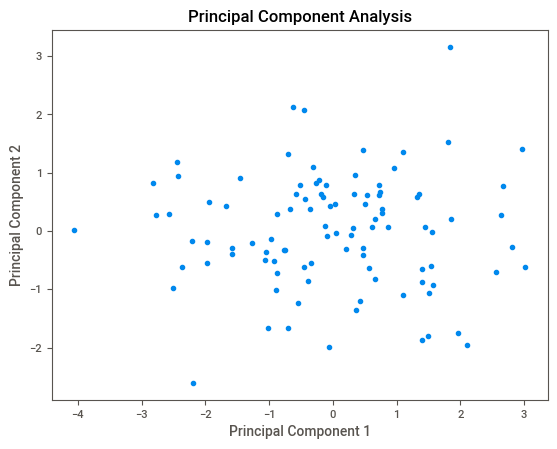

In [133]:
# Plot the principal components
plt.scatter(pca_df['Principal Component 1'], pca_df['Principal Component2'])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Principal Component Analysis')
plt.show()

### 5. VIF Score (다중공선성)

In [146]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Generate random sample data with correlations
np.random.seed(42)
size = 100
feature1 = np.random.randn(size)
feature2 = feature1 + np.random.randn(size) * 0.1 # Highly correlated with feature1
feature3 = np.random.randn(size)
target = feature1 * 0.5 + np.random.randn(size) * 0.1 # Highly correlated with feature1
data = {
    'Feature1': feature1,
    'Feature2': feature2,
    'Feature3': feature3,
    'Target': target
}
df = pd.DataFrame(data)
X = df.drop('Target', axis=1)

df

,Feature1,Feature2,Feature3,Target
0,0.496714,0.355177,0.357787,0.165458
1,-0.138264,-0.180329,0.560785,-0.125150
2,0.647689,0.613417,1.083051,0.398574
3,1.523030,1.442802,1.053802,0.822552
4,-0.234153,-0.250282,-1.377669,-0.119167
...,...,...,...,...
95,-1.463515,-1.424983,-0.692910,-0.778675
96,0.296120,0.207735,0.899600,-0.023253
97,0.261055,0.276428,0.307300,0.265915
98,0.005113,0.010934,0.812862,-0.008897


In [147]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# 1. VIF 계산은 선형 회귀 기반이므로 반드시 스케일이 중요하지 않음
# 2. 상수항 추가 (Intercept)
X_const = add_constant(X)

# 3. VIF 계산
vif_data = pd.DataFrame()
vif_data["Feature"] = X_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_const.values, i)
                   for i in range(X_const.shape[1])]

print(vif_data)


    Feature        VIF
0     const   1.020278
1  Feature1  90.865219
2  Feature2  90.787385
3  Feature3   1.037920


#### 다중공선성 피하기 위해서 자주 사용되는 VIF Score
- VIF 10 이상인 피쳐  = 심각한 다중공선성 ; 제거하거나 변환 필요


![이미지 설명](images/vif.png)

##  Dataset Split (데이터 분할)
1. Train : Test ; 8:2
2. Train : Validation : Test : 6:2:2
- Train으로 훈련, Validation 으로 성능 테스트 및 튜닝, Test로 최종 모델 선택

In [135]:
import numpy as np
from sklearn.datasets import load_wine
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load dataset
data = load_wine()
X, y = data.data, data.target
# Initialize the model
model = RandomForestClassifier(random_state=42)

####  K교차 검증
1) 훈련셋을 복원 없이 K개로 분리 후, K-1개는 하위 훈련셋으로, 나머지 1개는 검증셋으로 사용.
2) 검증셋과 하위훈련셋을 번갈아가면서 K번 반복하여 모델링
3) K개의 성능 추정치 평균으로 최종 모델 성능 기준 결정

![이미지 설명](images/K-fold.png)


### 시계열데이터 데이터 분할

![이미지 설명](images/times_train.png)

In [138]:
# Perform 5-fold cross-validation
cv_scores = cross_val_score(model, X, y, cv=5)
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())

Cross-validation scores: [0.97222222 0.94444444 0.97222222 0.97142857 1.        ]
Mean cross-validation score: 0.9720634920634922


In [141]:
# Perform a typical train-test split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42) # 8:2

In [142]:
# Train the model
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [143]:
# Test the model
y_pred = model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print("Train-test split accuracy:", test_accuracy)

Train-test split accuracy: 1.0


In [145]:
cv_scores

array([0.97222222, 0.94444444, 0.97222222, 0.97142857, 1.        ])

In [144]:
# Compare the results
print("\nComparison of Results:")
print(f"Mean cross-validation score:{cv_scores.mean():.4f}")
print(f"Train-test split accuracy: {test_accuracy:.4f}")


Comparison of Results:
Mean cross-validation score:0.9721
Train-test split accuracy: 1.0000
